# Adidas Sales Data 
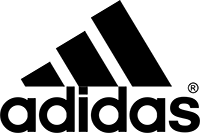

## Upload file from Local Drive

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving adidas.csv to adidas.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn import tree


# Importing Data

In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['adidas.csv']))
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [ ]:
# delete first column
df = df.drop('Unnamed: 0',axis=1)
df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


## EDA

In [ ]:
# shape of dataset
df.shape

(9648, 13)

In [ ]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   int64  
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 980.0+ KB


In [ ]:
# count NAN in dataset
df.isna().sum()


Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [ ]:
# luckily there is no missing value in dataset

In [ ]:
df.describe() # summary of Data

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


# **Top Selling Products**

In [ ]:
top_selling_products = df.groupby('Product')['Total Sales'].sum().reset_index() #group by products and apply sum function on Total Sales Column
top_selling_products.index+=1 # the index starts from 0 by default so we plus 1 in index here
top_selling_products

,Product,Total Sales
1,Men's Apparel,123728632.0
2,Men's Athletic Footwear,153673680.0
3,Men's Street Footwear,208826244.0
4,Women's Apparel,179038860.0
5,Women's Athletic Footwear,106631896.0
6,Women's Street Footwear,128002813.0


In [ ]:
# graphical interpretation of these values


Text(0.5, 1.0, 'Top Selling Products')

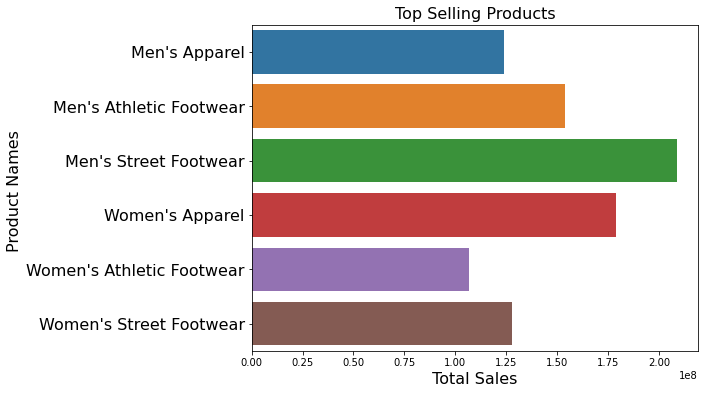

In [ ]:

fig , ax = plt.subplots(figsize=(8,6))

sns.barplot(data = top_selling_products,y= 'Product',x ='Total Sales')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)

ax.set_xlabel(' Total Sales ', fontsize = 16)
ax.set_ylabel('Product Names ', fontsize = 16)
ax.set_title('Top Selling Products', fontsize = 16)
    

# Top Grossing Cities

In [ ]:
top_grossing = df.groupby('City')['Operating Profit'].sum().sort_values(ascending = False).reset_index().head(10)
top_grossing.index+=1
top_grossing

,City,Operating Profit
1,Charleston,15607190.11
2,New York,13899973.16
3,Miami,12168619.11
4,Portland,10760799.37
5,San Francisco,10256249.56
6,Houston,9845141.06
7,Charlotte,9756422.87
8,Albany,9429850.91
9,New Orleans,9417233.49
10,Birmingham,9147581.39


# **Pie Chart of Top Grossing Cities**

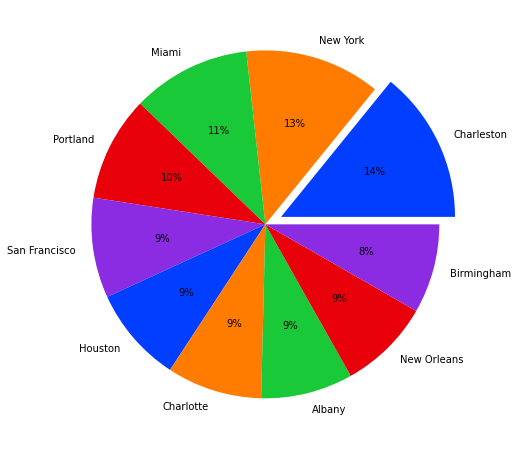

In [ ]:
#for pie chart we need 2 lists
data= list(top_grossing['Operating Profit']) #convert Operating Profit series in a list
labels = list(top_grossing['City']) #convert city series in a list
fig , ax = plt.subplots(figsize=(10,8))

colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0,0,0,0,0,0,0,0))
plt.show()

# Who are the Top Retailers?

In [ ]:
top_retailors = df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False).reset_index()
top_retailors.index += 1
top_retailors

,Retailer,Operating Profit
1,West Gear,85667873.18
2,Foot Locker,80722124.81
3,Sports Direct,74332954.96
4,Kohl's,36811252.58
5,Amazon,28818503.31
6,Walmart,25782052.61


# **Bar Chart of Top Retailers**

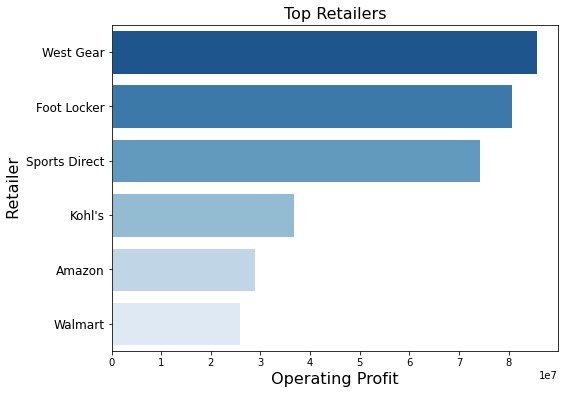

In [ ]:
fig , ax = plt.subplots(figsize=(8,6))
sns.set(style='darkgrid')
sns.barplot(data=top_retailors, x='Operating Profit', y='Retailer', palette='Blues_r')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 12)
ax.set_xlabel(' Operating Profit ', fontsize = 16)
ax.set_ylabel(' Retailer ', fontsize = 16)
ax.set_title('Top Retailers', fontsize = 16)
plt.show()

# **Top Selling Methods**

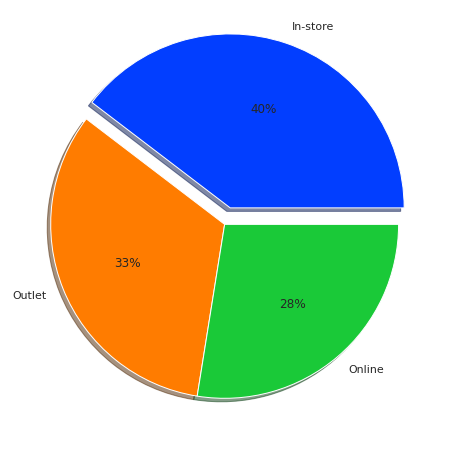

In [ ]:
top_methods = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False).reset_index()
#for pie chart we need 2 lists
data= list(top_methods['Total Sales']) #convert Operating Profit series in a list
labels = list(top_methods['Sales Method'])
fig , ax = plt.subplots(figsize=(10,8))

colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0), shadow =True)
plt.show()

# Find Regression of Sales

# Correlation Between different Variables using Heatmap


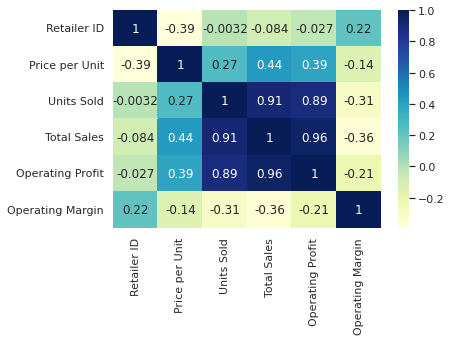

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Total Sales correlation value with Operating Profit = 0.96**

**Total Sales correlation value with Units Sold = 0.91**

**Total Sales correlation value with Price per Unit = 0.44**

# Profit Margin and Total Sales Regression



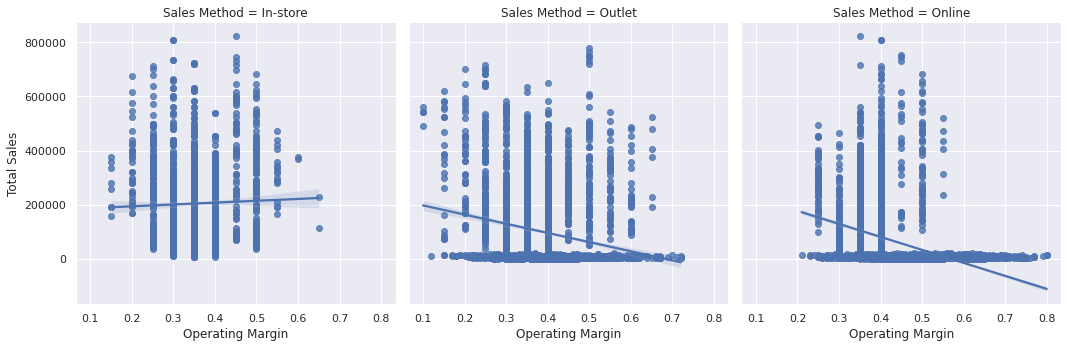

In [ ]:
sns.lmplot(data = df, x ='Operating Margin',y = 'Total Sales',col ='Sales Method')

# Price per Unit and Total Sales Regression



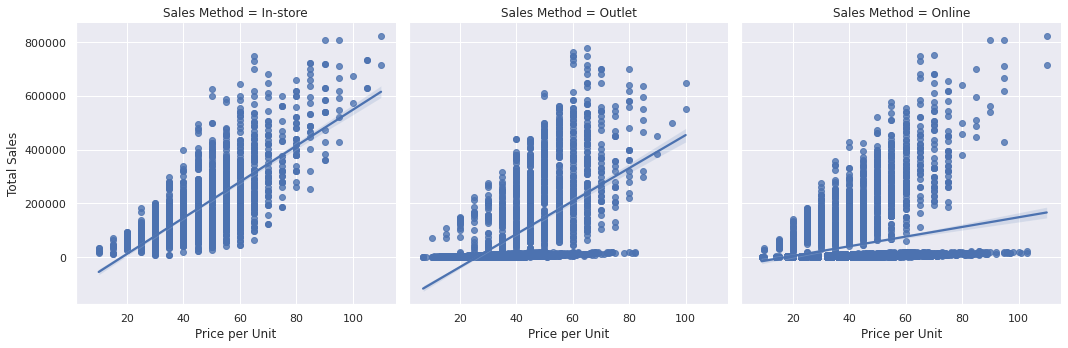

In [ ]:

sns.lmplot(data = df, x ='Price per Unit',y = 'Total Sales',col ='Sales Method')

# Units Sold and Total Sales Regression


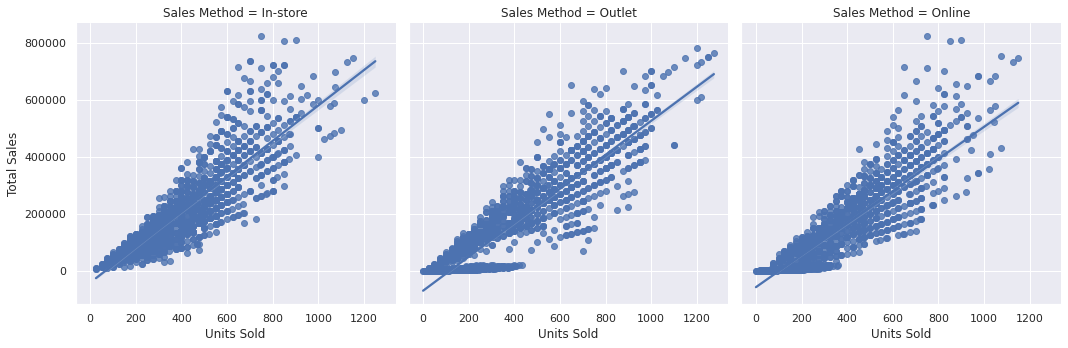

In [ ]:
sns.lmplot(data = df, x ='Units Sold',y = 'Total Sales',col ='Sales Method')

# Machine Learning Part

Train Test Model

In [ ]:
X = df[['Units Sold','Operating Profit','Price per Unit']] #features
y = df['Total Sales'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Linear Regression Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_predicted

array([  1829.70109017,  27970.10990229,   4821.70690064, ...,
        25440.71448354,   -641.38166592, -14162.10606571])

**Score**

In [ ]:
model.score(X_test,y_test)

0.9415222783822518

# Random Forest Model

In [ ]:
X = df[['Units Sold','Operating Profit','Price per Unit',]] #features
y = df['Total Sales'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = RandomForestRegressor (n_estimators = 5)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

**Score**

In [ ]:
model.score(X_test,y_test)

0.9968577173902254

# Score : 0.997

✌

# Descion Tree Model

In [ ]:
model = tree.DecisionTreeRegressor()
X = df[['Units Sold','Operating Profit','Price per Unit',]] #features
y = df['Total Sales'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

Score

In [ ]:
model.score(X_test,y_test)

0.9961314063305763

## Score : 0.996

## Scalling Data

In [ ]:
X = df[['Units Sold','Operating Profit','Price per Unit',]] #features
y = df['Total Sales'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestRegressor(n_estimators = 9)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)


In [ ]:
model.score(X_test,y_test)

0.9973477893055132

## Score : 0.9974

## K Neighbors Model

In [ ]:
X = df[['Units Sold','Operating Profit','Price per Unit',]] #features
y = df['Total Sales'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)


## Score

In [ ]:
model.score(X_test,y_test)

0.9383161816893438

## Score : 0.938

## *Conclusion*

**Random Forest Model is performing best for this DataSet with accuracy score : 0.997**

## Thank You